# Computer Vision Assignment 1 Part 1
---

Semester: **Fall 2022**

Due date: **September 29th 2022, 11.59PM EST.**

## Introduction
---

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST (handwritten digits)
- CIFAR-10 (32x32 resolution color images of 10 object classes)

## Instructions
---

You should perform this assignment using Google Colab. 
* Before starting, clone this assignment using `File > Save a copy in Drive`. 
* After you're done, go through the notebook and ensure that you have answered all questions.
* Finally, submit the ipynb `File > Download > Download .ipynb` on brightspace


## 1. Warmup [5%]
---

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand. MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. On the other hand, CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10

Use `matplotlib` and ipython notebook's visualization capabilities. See [this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for hints on how to achieve this.

## 2. Training a Single Layer Network on MNIST [10%]
---

* (a) Start by running the training on MNIST and train the model for 20 epochs.
By default, the model will train on MNIST.

This will initialize a single layer model and train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). The loss function ([cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy)) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`. The default values for the learning rate, batch size and number of epochs are given in the `options` cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. Note the decrease in training loss and corresponding decrease in validation errors.

* (b): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

* (c): Reduce the number of training examples to just 50. (Hint: limit the iterator in the `train` function) and train the model until the loss converges. Explain what is happening to the model.

## 3. Training a Multi-Layer Network on MNIST [10%]
---

* (a) Add an extra layer with 1000 hidden units and a `tanh` nonlinearity. (Hint: modify the `Net` class). Train the model for 10 epochs.
* (b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

## 4. Training a Convolutional Network on CIFAR [25%]
---

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- (a) Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

* (b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

* (c) Give a breakdown of the parameters within the above model, and the overall number.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may speed up training if you use a GPU runtime (`RunTime > Change Runtime Type > GPU`).

In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
from torch.autograd import Variable
from torch import flatten
import matplotlib.pyplot as plt
import numpy as np
## for summary
import torchvision.models as models
from torchsummary import summary

In [2]:
# Options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 20       # number of epochs to train
lr = 0.01         # learning rate

## **1. Warmup**

In [3]:
# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
dataset = "mnist"
def launch_dataloader(dataset = "mnist", batch_size = 64):
  if dataset == 'mnist':
      data_transform = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize((0.1307,), (0.3081,))
      ])
      trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
      testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

  elif dataset == 'mnist_50':
          data_transform = transforms.Compose([
              transforms.ToTensor(),
              transforms.Normalize((0.1307,), (0.3081,))
          ])
          torch.utils.data.Subset
          trainset = torch.utils.data.Subset(datasets.MNIST(root='.', train=True, download=True, transform=data_transform), indices = [i for i in range(50)])
          testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

  elif dataset == 'cifar10':
      data_transform = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
      ])
      trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
      testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

  train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
  test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)
  return train_loader, test_loader, trainset, testset

(a) Display 10 random images from each class of MNIST

Label:0


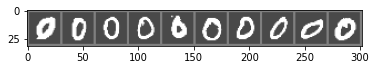

Label:1


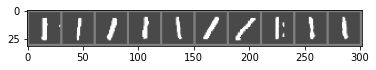

Label:2


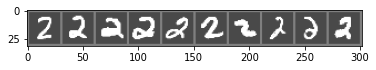

Label:3


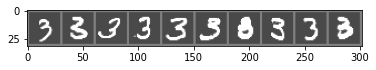

Label:4


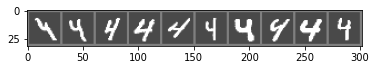

Label:5


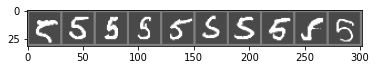

Label:6


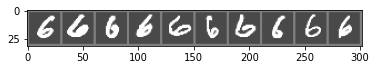

Label:7


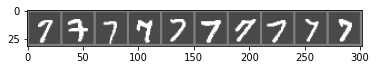

Label:8


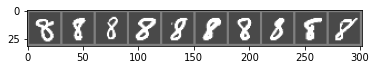

Label:9


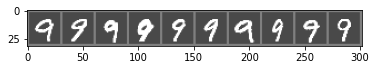

In [28]:
from matplotlib import image
# MNIST
import random
m_train_loader, m_test_loader, m_trainset, m_testset = launch_dataloader("mnist", 10)
m_classes = (0,1,2,3,4,5,6,7,8,9)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
m_images=[[] for i in range(len(m_classes))]
dataiter = iter(m_train_loader)
for image, label in dataiter:
    for i, v in enumerate(label):
        v =  v.item()
        if len(m_images[v]) == 10: continue
        elif len(m_images[v]) < 10:
            m_images[v].append(image[i])

for i in range(10):
    print('Label:' + str(m_classes[i]))
    imshow(torchvision.utils.make_grid(m_images[:][i], nrow = 10))

(b) Do the same for each class of CIFAR-10

Files already downloaded and verified
Files already downloaded and verified
Label:plane


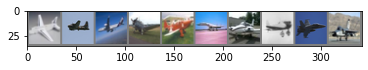

Label:car


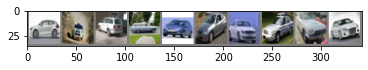

Label:bird


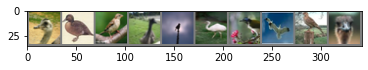

Label:cat


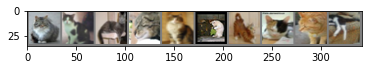

Label:deer


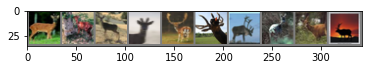

Label:dog


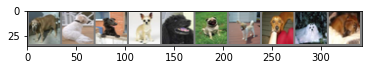

Label:frog


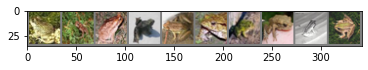

Label:horse


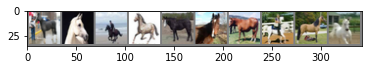

Label:ship


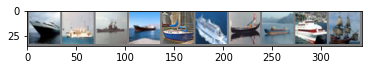

Label:truck


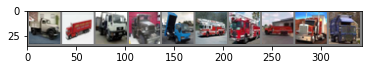

In [31]:
# CIFAR-10
c_train_loader, c_test_loader, c_trainset, c_testset = launch_dataloader("cifar10", 10)
c_classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# get some random training images
c_images=[[] for i in range(len(c_classes))]
dataiter = iter(c_train_loader)
for image, label in dataiter:
    for i, v in enumerate(label):
        v =  v.item()
        if len(c_images[v]) == 10: continue
        elif len(c_images[v]) < 10:
            c_images[v].append(image[i])


for i in range(10):
    print('Label:'+c_classes[i])
    imshow(torchvision.utils.make_grid(c_images[:][i], nrow = 10))


## **2. Training a Single Layer Network on MNIST**



(a) Start by running the training on MNIST and train the model for 20 epochs. By default, the model will train on MNIST.

In [ ]:
m_train_loader, m_test_loader, m_trainset, m_testset = launch_dataloader("mnist", 64)
c_train_loader, c_test_loader, c_trainset, c_testset = launch_dataloader("cifar10", 64)

## network and optimizer
def get_num_inputs(data_name):
  if dataset == 'mnist':
      num_inputs = 784
  elif dataset == 'cifar10':
      num_inputs = 3072
  return num_inputs

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_inputs = get_num_inputs('mnist')

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
def train(epoch, network, tnl):
    train_loader = tnl
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(network, ttl):
    test_loader = ttl
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, epochs + 1):
    train(epoch, network, m_train_loader)
    test(network, m_test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.442998
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.345692
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.344195
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.397599
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.545071
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.348564
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.346848
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.436844
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.298962
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.398834

Test set: Average loss: 0.3330, Accuracy: 9067/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.519428
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.396944
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.268563
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.277698
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.199885
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.469389
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.235288
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.204404
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.427506
T

(b): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch.

In [ ]:
print(network)

Net(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [ ]:
network_ = network.linear.weight.reshape(10, 28, 28).detach().numpy()
print(network.linear.weight.shape)

torch.Size([10, 784])


<Figure size 432x288 with 0 Axes>

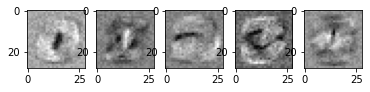

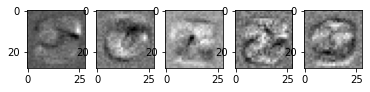

In [ ]:
network_reshape = network.state_dict()['linear.weight'].reshape(10,1,28,28)
plt.figure()
f, axarr = plt.subplots(1, 5)
for i in range(5):
    axarr[i].imshow(network_[i], cmap='gray')

f, axarr = plt.subplots(1, 5)
for i in range(5,10):
    axarr[i - 5].imshow(network_[i], cmap='gray')

(c): Reduce the number of training examples to just 50. (Hint: limit the iterator in the train function) and train the model until the loss converges. Explain what is happening to the model.


In [ ]:
# retrain and retest for new dataset
m_50_train_loader, m_50_test_loader, m_50_trainset, m_50_testset= launch_dataloader("mnist_50", 64)
num_inputs = get_num_inputs('mnist')
network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)


for epoch in range(1, 50 + 1):
    train(epoch, network, m_50_train_loader)
    test(network, m_50_test_loader)

Train Epoch: 1 [0/50 (0%)]	Loss: 2.518347

Test set: Average loss: 2.3280, Accuracy: 1323/10000 (13%)

Train Epoch: 2 [0/50 (0%)]	Loss: 2.270871

Test set: Average loss: 2.2099, Accuracy: 1858/10000 (19%)

Train Epoch: 3 [0/50 (0%)]	Loss: 2.067662

Test set: Average loss: 2.1112, Accuracy: 2467/10000 (25%)

Train Epoch: 4 [0/50 (0%)]	Loss: 1.893870

Test set: Average loss: 2.0258, Accuracy: 3077/10000 (31%)

Train Epoch: 5 [0/50 (0%)]	Loss: 1.742324

Test set: Average loss: 1.9506, Accuracy: 3559/10000 (36%)

Train Epoch: 6 [0/50 (0%)]	Loss: 1.608872

Test set: Average loss: 1.8838, Accuracy: 3988/10000 (40%)

Train Epoch: 7 [0/50 (0%)]	Loss: 1.490694

Test set: Average loss: 1.8242, Accuracy: 4318/10000 (43%)

Train Epoch: 8 [0/50 (0%)]	Loss: 1.385631

Test set: Average loss: 1.7708, Accuracy: 4545/10000 (45%)

Train Epoch: 9 [0/50 (0%)]	Loss: 1.291912

Test set: Average loss: 1.7229, Accuracy: 4763/10000 (48%)

Train Epoch: 10 [0/50 (0%)]	Loss: 1.208035

Test set: Average loss: 1.679

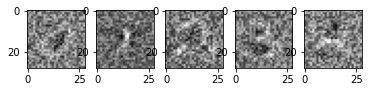

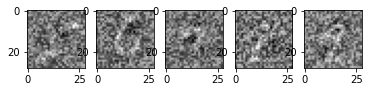

In [ ]:
network_50 = network.linear.weight.reshape(10, 28, 28).detach().numpy()
network_50_reshape = network_.reshape(10,1,28,28)

f, axarr = plt.subplots(1, 5)
for i in range(5):
    axarr[i].imshow(network_50[i], cmap='gray')

f, axarr = plt.subplots(1, 5)
for i in range(5,10):
    axarr[i - 5].imshow(network_50[i], cmap='gray')


Explanation: 

We could see that the output graphs includes many noises. The variance of the estimation is too large due to the small size of the training dataset that 50 examples are not enough to learn right weight in a reasonable way. And it may indicate overfitting because the parameters for neural network is large whereas the data is too small. 


## **3. Training a Multi-Layer Network on MNIST**

(a) Add an extra layer with 1000 hidden units and a tanh nonlinearity. (Hint: modify the Net class). Train the model for 10 epochs.

In [ ]:
# set epochs back to 10
epochs = 10       # number of epochs to train
num_outputs = 10
num_inputs = get_num_inputs('mnist')
num_hiddens = 1000

class MLP(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(MLP, self).__init__()
        self.num_inputs = num_inputs
        self.net = nn.Sequential(nn.Linear(num_inputs, num_hiddens), nn.Tanh(),
                                 nn.Linear(num_hiddens, num_outputs))

    def forward(self, input):
        input = input.view(-1, self.num_inputs)
        output = self.net(input)
        return output

# reset the network and optimizer
multi_network = MLP(num_inputs, num_outputs)
optimizer = optim.SGD(multi_network.parameters(), lr=lr)
m_train_loader, m_test_loader, m_trainset, m_testset = launch_dataloader("mnist", 64)

In [ ]:
for epoch in range(1, epochs + 1):
    train(epoch, multi_network, m_train_loader)
    test(multi_network, m_test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.308424
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.683479
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.641320
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.424394
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.385990
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.492658
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.552469
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.462357
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.289296
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.490651

Test set: Average loss: 0.3219, Accuracy: 9095/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.452369
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.285438
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.344730
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.330580
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.254427
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.339258
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.365429
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.513049
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.193854
T

(b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

In [ ]:
# reset the network and optimizer
multi_network = MLP(num_inputs, num_outputs)
optimizer = optim.SGD(multi_network.parameters(), lr=10)

In [ ]:
for epoch in range(1, epochs + 1):
    train(epoch, multi_network, m_train_loader)
    test(multi_network, m_test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 123.127731
Train Epoch: 1 [6400/60000 (11%)]	Loss: 173.181580
Train Epoch: 1 [12800/60000 (21%)]	Loss: 512.323975
Train Epoch: 1 [19200/60000 (32%)]	Loss: 171.766693
Train Epoch: 1 [25600/60000 (43%)]	Loss: 138.085617
Train Epoch: 1 [32000/60000 (53%)]	Loss: 123.811249
Train Epoch: 1 [38400/60000 (64%)]	Loss: 69.014931
Train Epoch: 1 [44800/60000 (75%)]	Loss: 353.248535
Train Epoch: 1 [51200/60000 (85%)]	Loss: 161.656036
Train Epoch: 1 [57600/60000 (96%)]	Loss: 194.031738

Test set: Average loss: 245.1749, Accuracy: 6895/10000 (69%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 237.255905
Train Epoch: 2 [6400/60000 (11%)]	Loss: 164.654236
Train Epoch: 2 [12800/60000 (21%)]	Loss: 123.561188
Train Epoch: 2 [19200/60000 (32%)]	Loss: 131.907288
Train Epoch: 2 [25600/60000 (43%)]	Loss: 117.957779
Train Epoch: 2 [32000/60000 (53%)]	Loss: 217.467468
Train Epoch: 2 [38400/60000 (64%)]	Loss: 143.347107
Train Epoch: 2 [44800/60000 (75%)]	Loss: 87.938751
Train Epoch: 2 

A brief explanation:

A large learning rate will lead to a low accuracy and the loss is hard to converge. And also, it will lead to an unstable learning process, making it less meaningful.

## **4. Training a Convolutional Network on CIFAR**

(a) Create a convolutional network with the following architecture:

  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

In [ ]:
epochs = 20       # number of epochs to train

In [ ]:
num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_inputs = get_num_inputs('cifar10')
class CN(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(CN, self).__init__() 
        # input image channel, output channels, kernel_size
        self.net = nn.Sequential( 
            nn.Conv2d(3, 16, kernel_size=(5,5)),
            nn.Tanh(),
            nn.MaxPool2d((2, 2), stride=(2, 2)),
            nn.Conv2d(16, 128, kernel_size=(5,5)),
            nn.Tanh(),
            nn.MaxPool2d((2, 2), stride=(2, 2)),
            nn.Flatten(1, -1),
            nn.Linear(128 * 5 * 5, 64),
            nn.Tanh(),
            nn.Linear(64,10)
        )
    def forward(self, input):
        output = self.net(input)
        return output

(b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

In [ ]:
c_train_loader, c_test_loader, c_trainset, c_testset = launch_dataloader("cifar10", 64)
c_network = CN(num_inputs, num_outputs)
optimizer = optim.SGD(c_network.parameters(), lr = lr)
for epoch in range(1, epochs + 1):
    train(epoch, c_network, c_train_loader)
    test(c_network, c_test_loader)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.317437
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.061420
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.081144
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.864801
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.889938
Train Epoch: 1 [32000/50000 (64%)]	Loss: 2.044435
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.828316
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.866478

Test set: Average loss: 1.8238, Accuracy: 3665/10000 (37%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.786322
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.774674
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.811836
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.715416
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.711121
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.794178
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.616938
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.680436

Test set: Average loss: 1.6168, Accuracy: 4242/10000 (42%)

Train Epoch: 3

torch.Size([16, 3, 5, 5])


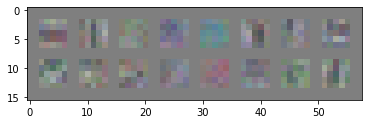

In [ ]:
# Show an image of the first layer filters.
first_layer = c_network.net[0].weight
print(first_layer.shape)
imshow(torchvision.utils.make_grid(first_layer).cpu())

(c) Give a breakdown of the parameters within the above model, and the overall number.

In [ ]:
summary(c_network.cpu(), input_size=(3, 32, 32), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]           1,216
              Tanh-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4          [-1, 128, 10, 10]          51,328
              Tanh-5          [-1, 128, 10, 10]               0
         MaxPool2d-6            [-1, 128, 5, 5]               0
           Flatten-7                 [-1, 3200]               0
            Linear-8                   [-1, 64]         204,864
              Tanh-9                   [-1, 64]               0
           Linear-10                   [-1, 10]             650
Total params: 258,058
Trainable params: 258,058
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.46
Params size (MB): 0.98
Estimated T

Convolution Layer: ( input * filter size + bias ) * output

Fully-connected layers: ( input + bias ) * output

Total for Convolution Layer 1:

( 5 * 5 * 3 + 1 ) * 16 = 1216

Total for Convolution Layer 2:

( 5 * 5 * 16 + 1 ) * 128 = 51200

Total for Connected Layer 1:

( 128 * 5 * 5 + 1 )* 64 = 204864

Total for Connected Layer 2:

( 64 + 1 ) * 10 = 650

Total Params: 258058